In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
clicks = pd.read_csv("data/clicks.csv", dtype={'advertiser_id': 'category', 'action_id': 'float64', 'source_id': 'category',
                                               'created': 'str', 'country_code':'category', 'latitude': 'float64',
                                               'longitude':'float64', 'wifi_connection':'bool' , 'carrier_id':np.float16,
                                               'trans_id':'str', 'os_minor':'float64', 'agent_device':'float64', 'os_major':'float64',
                                               'specs_brand':'int64', 'brand':'category', 'timeToClick':'float64',
                                               'touchX':'float64', 'touchY':'float64', 'ref_type':'category', 'ref_hash':'int64'}, parse_dates = ['created'])
clicks.drop('action_id', axis=1, inplace = True)
clicks['day_of_week'] = clicks['created'].dt.dayofweek
clicks['hour'] = clicks['created'].dt.hour
clicks.head(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,...,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,day_of_week,hour
0,2,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,...,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,2,22
1,0,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,...,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,4,10
2,0,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,...,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,4,15
3,2,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,...,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,2,3
4,2,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,...,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,2,3


In [3]:
clicks.dtypes

advertiser_id            category
source_id                category
created            datetime64[ns]
country_code             category
latitude                  float64
longitude                 float64
wifi_connection              bool
carrier_id                float16
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand                 int64
brand                    category
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                 category
ref_hash                    int64
day_of_week                 int64
hour                        int64
dtype: object

In [4]:
clicks.describe()

,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,timeToClick,touchX,touchY,ref_hash,day_of_week,hour
count,26351.000000,26351.000000,2.634000e+04,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,22977.000000,23011.000000,23011.000000,2.635100e+04,26351.000000,26351.000000
mean,1.206906,1.070233,inf,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,230.403309,0.638784,1.478656,4.611581e+18,2.760161,10.423437
std,0.004484,0.001896,7.015625e+00,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,976.849149,0.301983,2.622727,2.673175e+18,2.094397,7.771639
min,1.205058,1.058204,0.000000e+00,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.017000,0.000000,0.000000,9.286192e+14,0.000000,0.000000
25%,1.205689,1.070234,3.000000e+00,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,2.915000,0.426000,0.183000,2.273798e+18,1.000000,2.000000
50%,1.205689,1.070234,6.000000e+00,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,10.588000,0.726000,0.645000,4.623721e+18,2.000000,10.000000
75%,1.205689,1.070234,1.300000e+01,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,71.703000,0.901000,0.991000,6.917850e+18,5.000000,17.000000
max,1.237861,1.085358,1.160000e+02,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,17616.188000,1.000000,16.600000,9.221118e+18,6.000000,23.000000


In [5]:
clicks['carrier_id'].value_counts()

4.0      4569
6.0      3474
1.0      3307
13.0     2998
3.0      2944
12.0     2273
0.0      1368
10.0      753
14.0      588
9.0       555
17.0      519
19.0      496
18.0      468
22.0      462
2.0       264
15.0      263
5.0       212
21.0      211
25.0      202
30.0      121
24.0      117
27.0       58
29.0       33
67.0       13
33.0       12
76.0        6
26.0        6
45.0        6
91.0        3
28.0        3
31.0        3
48.0        2
93.0        2
59.0        2
65.0        2
37.0        2
11.0        2
115.0       2
39.0        2
55.0        2
112.0       1
102.0       1
116.0       1
35.0        1
74.0        1
113.0       1
52.0        1
80.0        1
105.0       1
75.0        1
77.0        1
106.0       1
69.0        1
34.0        1
103.0       1
Name: carrier_id, dtype: int64

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


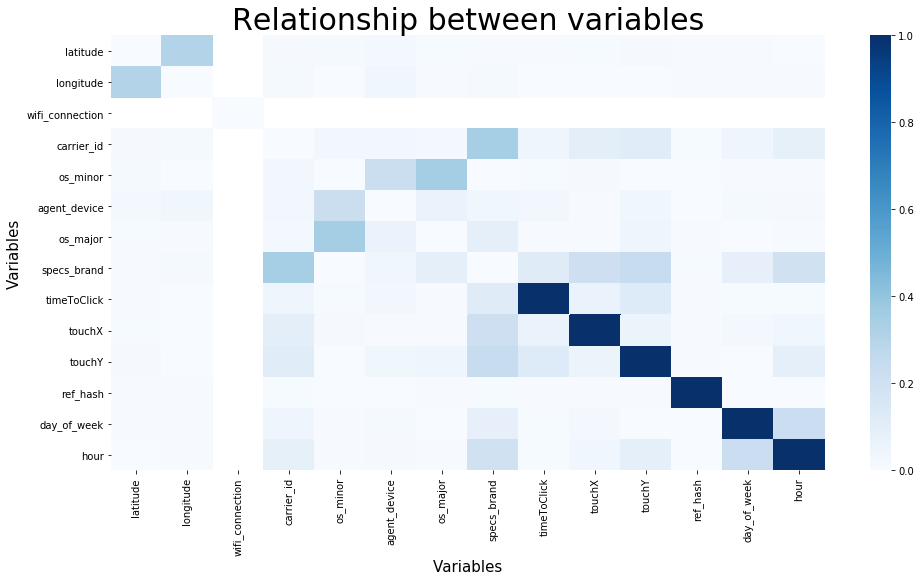

In [6]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = clicks.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)

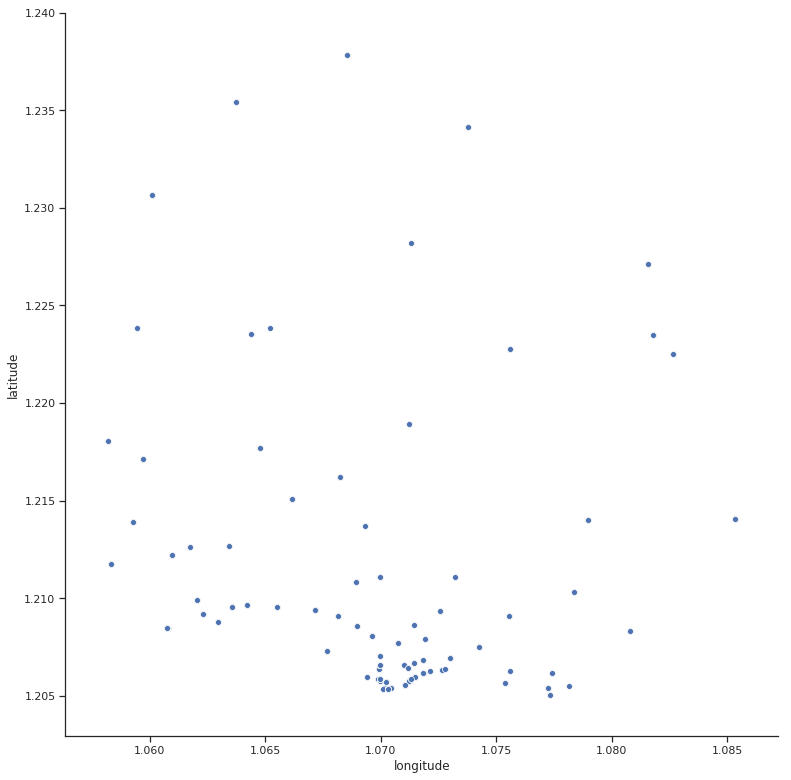

In [7]:
sns.set(style="ticks", color_codes=True)
#sns.pairplot(events, vars = ['event_id', 'ref_type', 'application_id'])
sns.pairplot(clicks, x_vars = ["longitude"], y_vars = ["latitude"], height = 11);

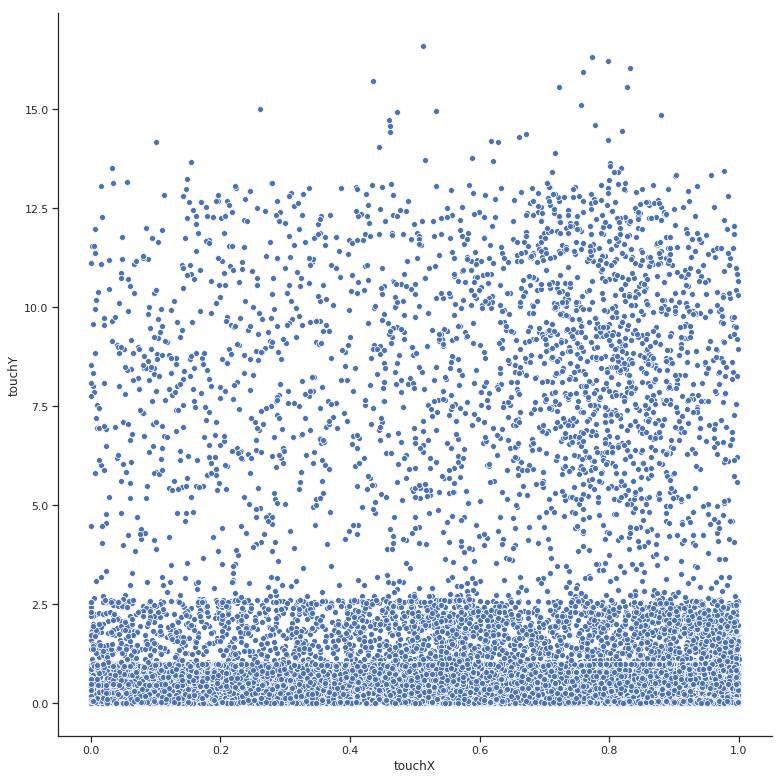

In [8]:
sns.set(style="ticks", color_codes=True)
clicks_acotado= clicks.loc[clicks['timeToClick'] != np.NaN]
#sns.pairplot(events, vars = ['event_id', 'ref_type', 'application_id'])
sns.pairplot(clicks_acotado, x_vars = ["touchX"], y_vars = ["touchY"], height = 11);
#sns.pairplot(clicks, x_vars = ["touchX"], y_vars = ["touchY"], height = 11, hue='timeToClick');

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


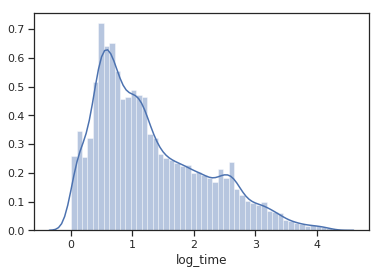

In [45]:
clicks['log_time'] = np.log10(clicks['timeToClick'] +1)
clicks_acotado = clicks.dropna(subset= ['log_time'])
g = sns.distplot(clicks_acotado['log_time'])

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


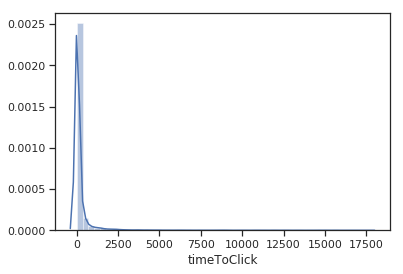

In [38]:
g = sns.distplot(clicks_acotado['timeToClick'])

In [30]:
np.log10(10)

1.0